<a href="https://colab.research.google.com/github/Arjun-P-Dinesh/Advanced-Machine-Learning/blob/main/2348506_LabProgram3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Program_3a: Logistic Regression:** <br>
Perform the following using Program 3a_dataset
1. Consider duration, age, and campaign columns as predictors and the column Y as target
variable. Y says whether the client will subscribe a term deposit or not.
2. Use 70% of the data as training data set and 30% of data as testing data set.
3. Build a logistic regression model.
4. Determine the classification accuracy rate of the model on both train and test set.
5. Display Classification Report and Confusion Matrix
6. Provide suitable inference on the model created.

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
data3a = pd.read_csv("/content/drive/MyDrive/Dataset/Program_3a_Dataset.csv")
data3a

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,54,blue-collar,divorced,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
41184,55,unknown,married,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
41185,34,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
41186,52,technician,married,basic.9y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [52]:
data3a.head(11)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,56,technician,married,basic.4y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,58,management,unknown,university.degree,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,32,entrepreneur,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,38,admin.,single,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [53]:
data3a.shape

(41188, 21)

In [54]:
data3a.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [55]:
#there is no null values here

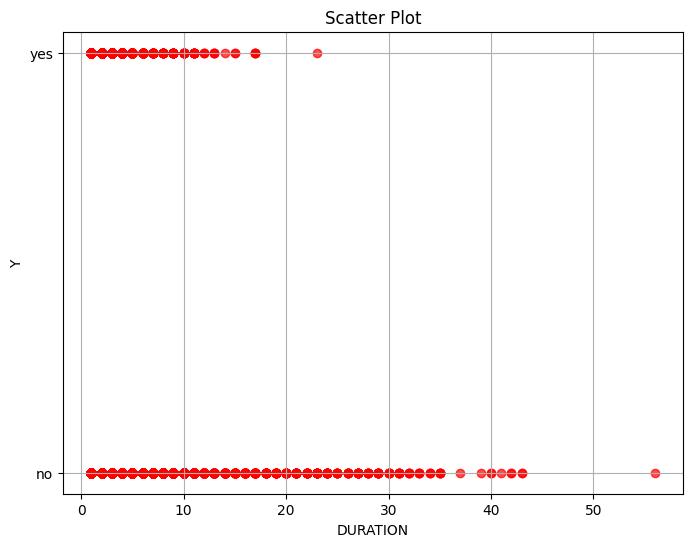

In [56]:
column1 = data3a['campaign']
column2 = data3a['y']

plt.figure(figsize=(8, 6))
plt.scatter(column1, column2, color='red', alpha=0.7)
plt.title('Scatter Plot')
plt.xlabel('DURATION')
plt.ylabel('Y')
plt.grid(True)
plt.show()

In [57]:
data3a.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [58]:
#set target and predictor values
x = data3a[['duration','campaign','age']]
y = data3a['y']

In [59]:
#splitting training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [60]:
#logistic regression model creation
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [61]:
prediction = log_reg.predict(x_test)

In [62]:
train_accuracy = log_reg.score(x_train, y_train)
print(f"Training Accuracy: {train_accuracy}")

test_accuracy = log_reg.score(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.8927543269397523
Test Accuracy: 0.8949583232176095


In [63]:
  # This tells us that the model correctly predicts 89.28% of the labels in the training dataset.
  # During testing the model correctly predicts 89.50% of the labels in the test dataset,
  # which it has never seen during training.


In [64]:
from sklearn.metrics import confusion_matrix

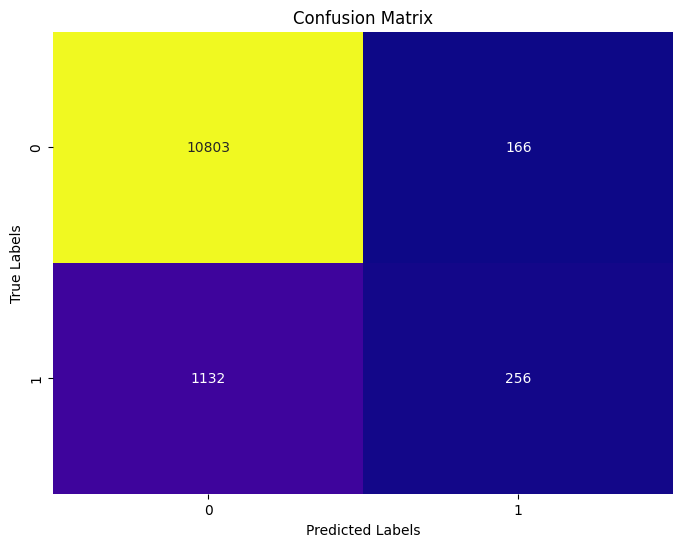

In [65]:
conf_matrix = confusion_matrix(y_test, prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='plasma', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [66]:
from sklearn.metrics import classification_report

In [67]:
class_report = classification_report(y_test, prediction)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

          no       0.91      0.98      0.94     10969
         yes       0.61      0.18      0.28      1388

    accuracy                           0.89     12357
   macro avg       0.76      0.58      0.61     12357
weighted avg       0.87      0.89      0.87     12357



**Program_3b: Logistic Regression:**
<br>
Perform the following using Program3b_dataset
1. Consider &#39;variance&#39;, &#39;skewness&#39;, &#39;curtosis&#39;, &#39;entropy&#39; columns as predictors and the column
&#39;class&#39; as the target  variable
2. Build a logistic regression model.
3. Calculate the classification accuracy, precision and recall for the model
4. Display Classification Report and Confusion Matrix
5. Provide suitable inference on the model created.

In [68]:
data3b = pd.read_csv("/content/drive/MyDrive/Dataset/Program_3b_dataset.csv")
data3b

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [69]:
data3b.head(11)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [70]:
data3b.shape

(1372, 5)

In [71]:
data3b.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [72]:
#no null values here

In [73]:
data3b.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

In [74]:
x2 = data3b[['variance', 'skewness', 'curtosis', 'entropy']]
y2 = data3b['class']
#setting target and predictor variables

In [75]:
x2train, x2test, y2train, y2test = train_test_split(x2, y2, test_size=0.3, random_state=42)

In [76]:
log_reg_2 = LogisticRegression()
log_reg.fit(x2train, y2train)


LogisticRegression()

In [77]:
y_pred_2 = log_reg.predict(x2test)

In [78]:
train_accuracy_2 = log_reg.score(x2train, y2train)
print(f"Training Accuracy: {train_accuracy_2}")

test_accuracy_2 = log_reg.score(x2test, y2test)
print(f"Test Accuracy: {test_accuracy_2}")

Training Accuracy: 0.9916666666666667
Test Accuracy: 0.9878640776699029


In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

precision_no = precision_score(y2test, y_pred_2, average=None)[0]
precision_yes = precision_score(y2test, y_pred_2, average=None)[1]

recall_no = recall_score(y2test, y_pred_2, average=None)[0]
recall_yes = recall_score(y2test, y_pred_2, average=None)[1]

print(f"Precision for 'no' class: {precision_no}")
print(f"Precision for 'yes' class: {precision_yes}")

print(f"Recall for 'no' class: {recall_no}")
print(f"Recall for 'yes' class: {recall_yes}")

Precision for 'no' class: 0.9912280701754386
Precision for 'yes' class: 0.9836956521739131
Recall for 'no' class: 0.9868995633187773
Recall for 'yes' class: 0.9890710382513661


In [80]:
conf_matrix = confusion_matrix(y2test, y_pred_2)

# Calculate overall accuracy
accuracy = accuracy_score(y2test, y_pred_2)
print(f"Overall Accuracy: {accuracy}")

Overall Accuracy: 0.9878640776699029


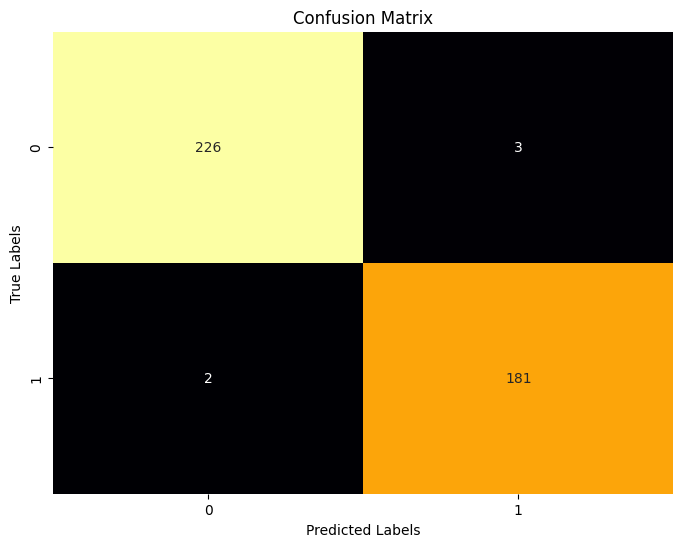

In [81]:
conf_matrix = confusion_matrix(y2test, y_pred_2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='inferno', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [83]:
class_reportfor2 = classification_report(y2test, y_pred_2)
print("Classification Report:")
print(class_reportfor2)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       229
           1       0.98      0.99      0.99       183

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



In [ ]:
# The model performs exceptionally well for both classes,
# with high precision, recall, and F1-scores. It's accurate in predicting both '0' and '1'.
#  It is very effective in distinguishing between these classes.